<a href="https://colab.research.google.com/github/ZackAkil/stateful-object-tracking/blob/main/Stateful_object_tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://github.com/ZackAkil/stateful-object-tracking/raw/main/dummy%20data/labeling_circles/processing-movie.mp4

--2023-05-16 21:49:13--  https://github.com/ZackAkil/stateful-object-tracking/raw/main/dummy%20data/labeling_circles/processing-movie.mp4
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ZackAkil/stateful-object-tracking/main/dummy%20data/labeling_circles/processing-movie.mp4 [following]
--2023-05-16 21:49:14--  https://raw.githubusercontent.com/ZackAkil/stateful-object-tracking/main/dummy%20data/labeling_circles/processing-movie.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82346 (80K) [application/octet-stream]
Saving to: ‘processing-movie.mp4’

processing-movie.mp 100%[==============

In [2]:
import cv2
import os

# Path to the video file
video_path = 'processing-movie.mp4'

# Open the video file
video = cv2.VideoCapture(video_path)

# Create the folder to save the images
output_folder = 'training_images'
os.makedirs(output_folder, exist_ok=True)

frame_number = 0

while True:
    # Set the frame position to the desired frame number
    video.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

    # Read the frame
    success, frame = video.read()

    if success:
        # Save the frame as an image
        image_path = os.path.join(output_folder, f'{frame_number}.jpg')
        cv2.imwrite(image_path, frame)
        print(f"Frame {frame_number} saved successfully: {image_path}")
        frame_number += 1
    else:
        print("End of video reached.")
        break


Frame 56 saved successfully: training_images/56.jpg
Frame 57 saved successfully: training_images/57.jpg
Frame 58 saved successfully: training_images/58.jpg
Frame 59 saved successfully: training_images/59.jpg
Frame 60 saved successfully: training_images/60.jpg
Frame 61 saved successfully: training_images/61.jpg
Frame 62 saved successfully: training_images/62.jpg


KeyboardInterrupt: ignored

In [ ]:
!zip -r training_images.zip training_images

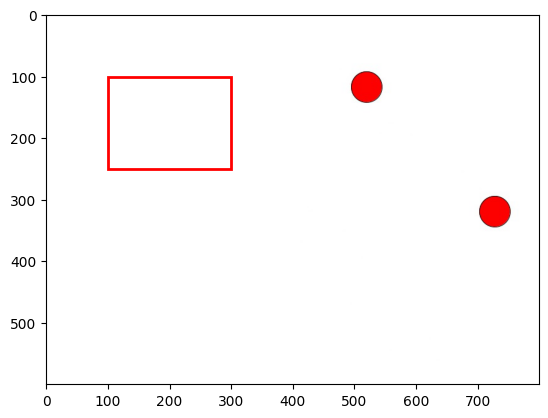

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Load the image
image_path = '/content/training_images/105.jpg'
image = Image.open(image_path)

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(image)

# Define the bounding box coordinates
x_min = 100
y_min = 100
width = 200
height = 150

# Create a rectangle patch
rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='r', facecolor='none')
# Add the rectangle patch to the axes
ax.add_patch(rect)
# Show the plot
plt.show()

In [4]:
!wget https://raw.githubusercontent.com/ZackAkil/stateful-object-tracking/main/dummy%20data/labeling_circles/bounding_box_coordinates.csv

--2023-05-16 22:18:34--  https://raw.githubusercontent.com/ZackAkil/stateful-object-tracking/main/dummy%20data/labeling_circles/bounding_box_coordinates.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9314 (9.1K) [text/plain]
Saving to: ‘bounding_box_coordinates.csv.1’

bounding_box_coordi 100%[===================>]   9.10K  --.-KB/s    in 0s      

2023-05-16 22:18:34 (98.9 MB/s) - ‘bounding_box_coordinates.csv.1’ saved [9314/9314]



In [5]:
import csv

# Path to the CSV file
csv_path = 'bounding_box_coordinates.csv'

# Open the CSV file
with open(csv_path, 'r') as file:
    # Create a CSV reader
    reader = csv.reader(file)
    
    # Initialize an empty list to store the data
    data = []
    
    # Read and process each row
    for row in reader:
        # Convert row values to numbers and append to the data list
        row_numbers = [float(value) for value in row]
        data.append(row_numbers)

In [6]:
FRAME_N = 40

In [7]:
data[FRAME_N]

[621.0, 671.0, 548.0, 598.0, 539.0, 589.0, 480.0, 530.0]

In [8]:
def convert_coordinates(min_x, max_x, min_y, max_y):
    x_min = min_x
    y_min = min_y
    width = max_x - min_x
    height = max_y - min_y
    return x_min, y_min, width, height

def display_image_with_bounding_boxes(image_filename, bounding_boxes):
    # Load the image
    image = Image.open(image_filename)

    display_Image_matrix_with_boxes(image, bounding_boxes)


def display_Image_matrix_with_boxes(image, bounding_boxes):

    # Create figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(image)

    # Add bounding boxes to the plot
    for bbox in bounding_boxes:
        print(bbox)
        x_min, y_min, width, height = convert_coordinates(*bbox)
        rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    # Show the plot
    plt.show()

[621.0, 671.0, 548.0, 598.0]
[539.0, 589.0, 480.0, 530.0]


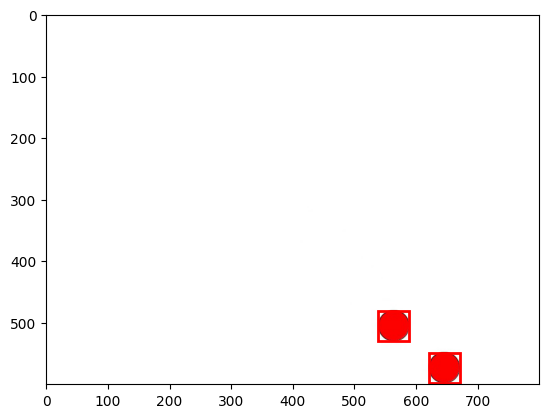

In [9]:
display_image_with_bounding_boxes(f'training_images/{FRAME_N}.jpg',
                                  [data[FRAME_N][:4], data[FRAME_N][4:]])

In [10]:
import os
import cv2
import numpy as np
from skimage.transform import resize

In [11]:
# Folder path containing the images
folder_path = 'training_images'

# Get a list of image file names in the folder
image_count = len(os.listdir(folder_path))

# Initialize an empty list to store the loaded images
images = []

# Loop through the images in the folder
for i in range(image_count):  # Assuming you have 100 images (adjust the range accordingly)
    image_path = os.path.join(folder_path, f'{i}.jpg')
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB if needed
    # image = preprocess_image(image)  # Preprocess the image (if necessary)
    images.append(  resize(image, (500,500)) )

# Convert the list of images to a numpy array
images = np.array(images)

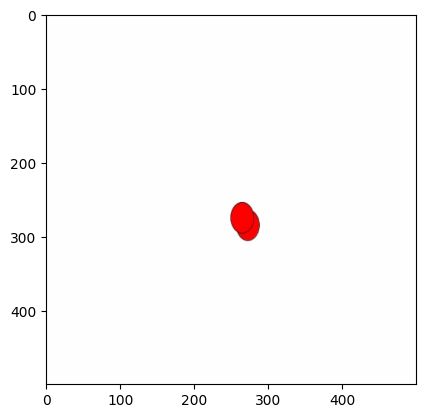

In [12]:
plt.imshow(images[5])

In [13]:

X = images / 255. 

In [18]:
X.shape

(300, 600, 800, 3)

In [19]:
# min_x, max_x, min_y, max_y

In [21]:
data[0]

[381.0, 431.0, 282.0, 332.0, 379.0, 429.0, 280.0, 330.0]

In [14]:
# normalise label coordinates

np_labels = np.array(data)

# Scaling factors for each column
scaling_factors = np.array([800., 800., 600., 600., 800., 800., 600., 600.])

# Scale the columns by different values
scaled_matrix = np_labels / scaling_factors

print(scaled_matrix)

[[0.47625    0.53875    0.47       ... 0.53625    0.46666667 0.55      ]
 [0.48375    0.54625    0.48166667 ... 0.54125    0.475      0.55833333]
 [0.49125    0.55375    0.49333333 ... 0.54625    0.48333333 0.56666667]
 ...
 [0.81375    0.87625    0.20166667 ... 0.14125    0.725      0.80833333]
 [0.82125    0.88375    0.21333333 ... 0.14625    0.71666667 0.8       ]
 [0.82875    0.89125    0.225      ... 0.15125    0.70833333 0.79166667]]


(300, 50, 50)

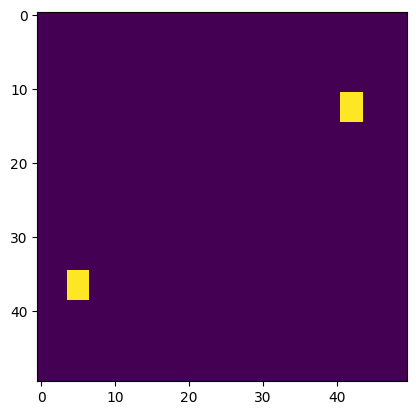

In [15]:
def generate_box_mask(image_shape, bbox_coords):
    # Create an empty mask with the same shape as the image
    mask = np.zeros(image_shape, dtype=np.uint8)

    # Iterate over the bounding box coordinates
    for bbox in bbox_coords:
        x_min, x_max, y_min, y_max = bbox

        # Set the corresponding region in the mask to black
        mask[y_min:y_max, x_min:x_max] = 1

    return mask

y_masks = []

for m in scaled_matrix:
  # Example usage
  image_shape = (50, 50)  # Shape of the image
  bbox_coords = [ (m[:4] * image_shape[0]).astype(int), (m[4:] *  image_shape[0]).astype(int)]  # Example bounding box coordinates

  mask = generate_box_mask(image_shape, bbox_coords)
  y_masks.append(mask)
  # Display the mask (black box)
  # print(mask)

y_masks=  np.array(y_masks) 
plt.imshow(mask)
y_masks.shape

In [16]:
scaled_matrix.shape

(300, 8)

In [17]:
y = y_masks

In [18]:
X.shape, y.shape

((300, 500, 500, 3), (300, 50, 50))

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# X_train = X[:100] 
# X_test = X[100:] 
# y_train = y[:100] 
# y_test = y[100:] 

# X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                      test_size=0.2, random_state=42)

In [70]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Reshape,Conv2D,Conv2DTranspose, MaxPooling2D, Flatten, Dense, Activation


In [71]:

# Load and preprocess your dataset
# X_train: input images
# y_train: bounding box coordinates of the two objects
image_height=500
image_width=500
image_channels=3

In [77]:


# Define the model architecture
input_shape = (image_height, image_width, image_channels)
inputs = Input(shape=input_shape)
x = Conv2D(16, kernel_size=(3, 3), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(4, 4))(x)
x = Conv2D(32, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(4, 4))(x)
x = Conv2D(32, kernel_size=(4, 4), activation='relu')(x)
x = MaxPooling2D(pool_size=(4, 4))(x)
x = Flatten()(x)
x = Dense(2500, activation="sigmoid")(x)
x = Dense(2500, activation="sigmoid")(x)
output =  Reshape((50, 50))(x)



In [85]:
import tensorflow as tf

# Create the model
model = tf.keras.models.Sequential()

# Encoder
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(500, 500, 3)))
model.add(tf.keras.layers.MaxPooling2D((10, 10)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((5, 5)))

# Decoder
model.add(tf.keras.layers.Conv2DTranspose(128, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.UpSampling2D((5, 5)))
model.add(tf.keras.layers.Conv2DTranspose(1, (3, 3), activation='relu', padding='same'))

# Print the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 500, 500, 64)      1792      
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, 50, 50, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_61 (Conv2D)          (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_59 (MaxPoolin  (None, 10, 10, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_transpose_20 (Conv2D  (None, 10, 10, 128)      147584    
 Transpose)                                                      
                                                      

In [86]:
# model = Model(inputs=inputs, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')


In [87]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 500, 500, 64)      1792      
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, 50, 50, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_61 (Conv2D)          (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_59 (MaxPoolin  (None, 10, 10, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_transpose_20 (Conv2D  (None, 10, 10, 128)      147584    
 Transpose)                                                      
                                                      

In [88]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [124]:
# Train the model
# model.fit(X_train, y_train, batch_size=6, epochs=20, verbose=1)
history = model.fit(X_train, y_train, epochs=20, batch_size=10, validation_data=(X_test, y_test))



Epoch 1/20
24/24 [==============================] - 2s 75ms/step - loss: 0.0032 - val_loss: 0.0034
Epoch 2/20
24/24 [==============================] - 2s 70ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 3/20
24/24 [==============================] - 2s 63ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 4/20
24/24 [==============================] - 2s 72ms/step - loss: 0.0032 - val_loss: 0.0034
Epoch 5/20
24/24 [==============================] - 2s 80ms/step - loss: 0.0032 - val_loss: 0.0034
Epoch 6/20
24/24 [==============================] - 2s 74ms/step - loss: 0.0032 - val_loss: 0.0034
Epoch 7/20
24/24 [==============================] - 1s 58ms/step - loss: 0.0032 - val_loss: 0.0035
Epoch 8/20
24/24 [==============================] - 1s 57ms/step - loss: 0.0032 - val_loss: 0.0034
Epoch 9/20
24/24 [==============================] - 1s 58ms/step - loss: 0.0032 - val_loss: 0.0034
Epoch 10/20
24/24 [==============================] - 2s 66ms/step - loss: 0.0032 - val_loss: 0.0034
Epoch 11/

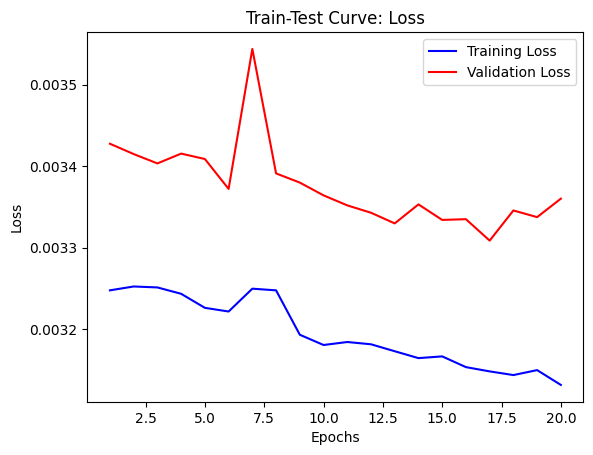

In [125]:
# Extract training and validation metrics from the history object
train_loss = history.history['loss']
# train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
# val_acc = history.history['val_accuracy']

# Plot the train-test curve
epochs = range(1, len(train_loss) + 1)

plt.figure()
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Train-Test Curve: Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plt.figure()
# plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
# plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
# plt.title('Train-Test Curve: Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

In [109]:
# images = X_test

np.random.seed(42)
# Sample 5 random indices
random_indices = np.random.choice(X_test.shape[0], size=5, replace=False)

random_x = X_test[random_indices]
random_y = y_test[random_indices]

In [126]:
random_x_predict = model.predict(random_x)

1/1 [==============================] - 0s 38ms/step


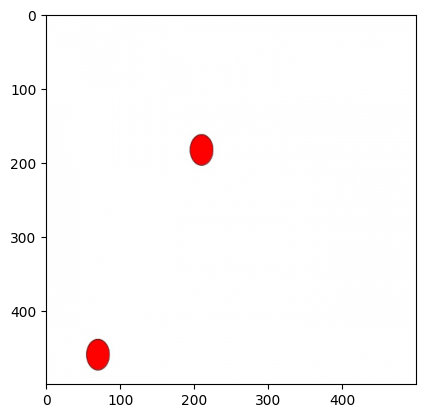

In [111]:
plt.imshow(random_x[0] * 255)

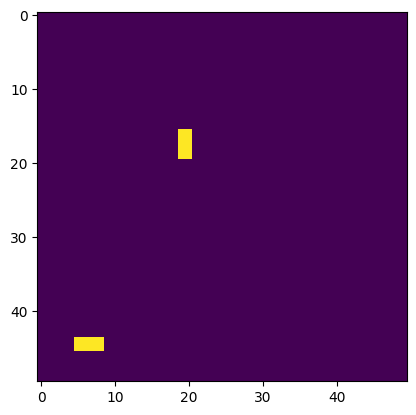

In [128]:
plt.imshow(random_x_predict[0] >0.5)

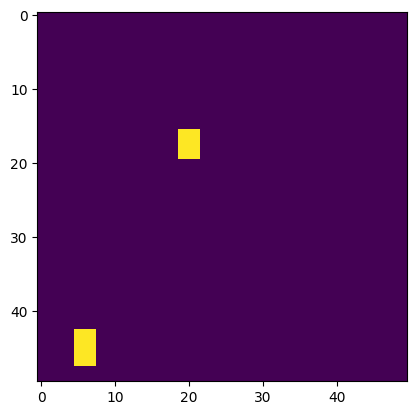

In [123]:
plt.imshow(random_y[0])

In [105]:
# # # Create a figure and subplot grid
# # fig, axs = plt.subplots(5, 1, figsize=(12, 4))

# # Loop through the random indices and display the images
# for i in range(len(random_x)):
#     image = random_x[i]
#     prediction = scale_random_x_predict[i]
#     display_Image_matrix_with_boxes(image,  [prediction[:4], prediction[4:]])

In [ ]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 2s 134ms/step - loss: 0.2060


0.20602598786354065

In [ ]:
mask.max()

1